In [ ]:
import numpy as np
import cv2
from skimage import io, color, filters
import requests
from io import BytesIO
import os
import matplotlib.pyplot as plt

In [ ]:
def carregar_imagem():
    try:
        from google.colab import files
        uploaded = files.upload()
        # Assuming only one file is uploaded, get the filename and content
        filename = list(uploaded.keys())[0]
        img_bytes = uploaded[filename]
        # Read the image from bytes using OpenCV
        img = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)
        return img
    except Exception as e:
        print(f"Erro ao carregar imagem: {e}")
        return None

In [ ]:
def borda_sobel(img):
    sobel_x = filters.sobel_h(img)
    sobel_y = filters.sobel_v(img)
    borda = np.hypot(sobel_x, sobel_y)
    borda = (borda / borda.max()) * 255
    return borda.astype(np.uint8)

In [ ]:
def borda_roberts(img):
    roberts_borda = filters.roberts(img)
    roberts_borda = (roberts_borda / roberts_borda.max()) * 255
    return roberts_borda.astype(np.uint8)

In [ ]:
def exibir_metadados_github(img, url):
    try:
        altura, largura = img.shape[:2]
        tipo_arquivo = os.path.splitext(url)[1].lower()
        tamanho_bytes = img.nbytes # Approximating size based on numpy array bytes

        print("===== Metadados da Imagem =====")
        print(f"Resolução: {largura} x {altura}")
        print(f"Tamanho aproximado em bytes: {tamanho_bytes}")
        print(f"Tipo de arquivo (baseado na URL): {tipo_arquivo}")
        print("================================")
    except Exception as e:
        print(f"Erro ao exibir metadados: {e}")


Processando ...


Saving imagem1.jpg to imagem1 (1).jpg
===== Metadados da Imagem =====
Resolução: 900 x 600
Tamanho aproximado em bytes: 1620000
Tipo de arquivo (baseado na URL): .png


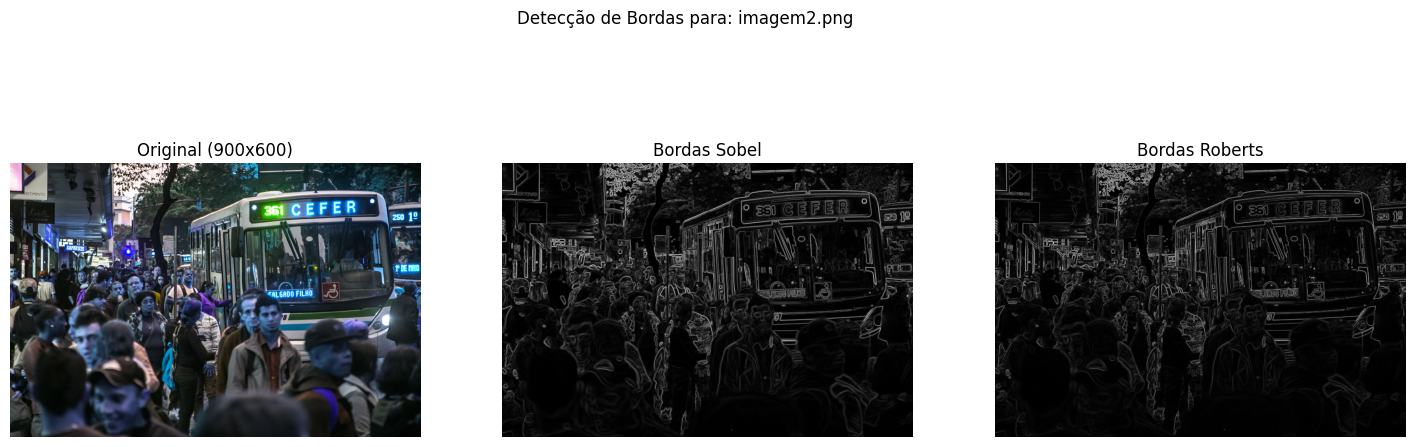


Processando ...


Saving imagem2.jpg to imagem2 (1).jpg
===== Metadados da Imagem =====
Resolução: 275 x 183
Tamanho aproximado em bytes: 150975
Tipo de arquivo (baseado na URL): .png


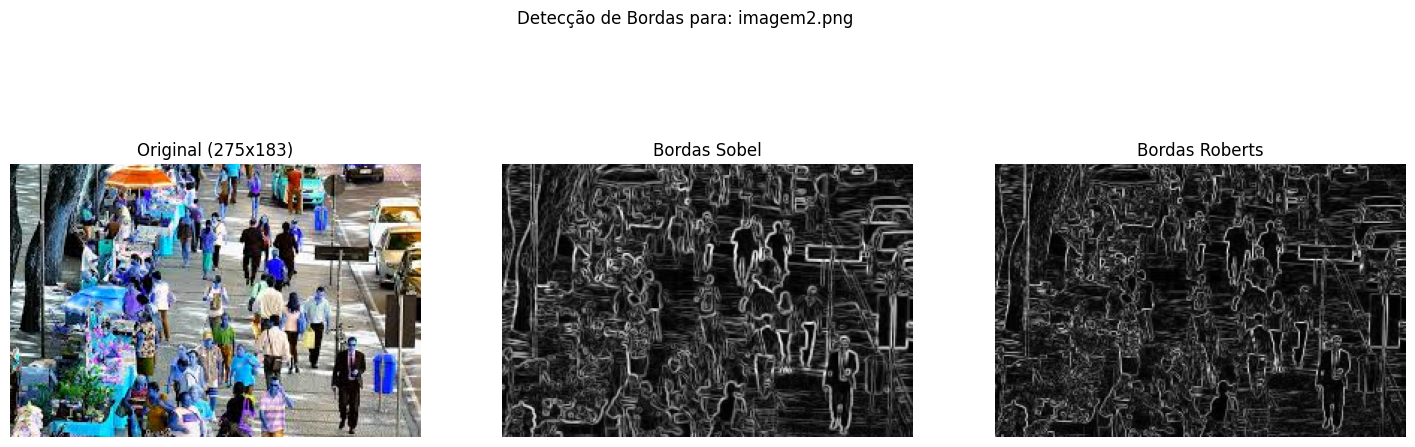

In [47]:
if __name__ == "__main__":

    for i in range(2):
        print("\nProcessando ...")
        img = carregar_imagem()

        if img is not None:
            exibir_metadados_github(img, url)

            # Convert the image to grayscale
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_processada = img_gray

            sobel_img = borda_sobel(img_processada)
            roberts_img = borda_roberts(img_processada)

            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            ax = axes.ravel()

            ax[0].imshow(img) # Reverted to displaying the original color image
            ax[0].set_title(f"Original ({img.shape[1]}x{img.shape[0]})")

            ax[1].imshow(sobel_img, cmap='gray')
            ax[1].set_title("Bordas Sobel")

            ax[2].imshow(roberts_img, cmap='gray')
            ax[2].set_title("Bordas Roberts")

            for a in ax:
                a.axis('off')

            plt.suptitle(f"Detecção de Bordas para: {url.split('/')[-1]}")
            plt.show()